## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 4*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


4. Implementar 3 algoritmos para segmentaci ́on binaria de im ́agenes. De estos, uno debe ser un algoritmo local. Aplicar cada uno de estos algoritmos a 3 im ́agenes en escala de grises diferentes y comparar los resultados obtenidos de cada segmentador. Concluya cúal de sus algoritmos obtiene mejores resultados.

____
#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

___
#### *Leer las imágenes*

Leer las dos imágenes iguales pero con diferentes ilumainaciones

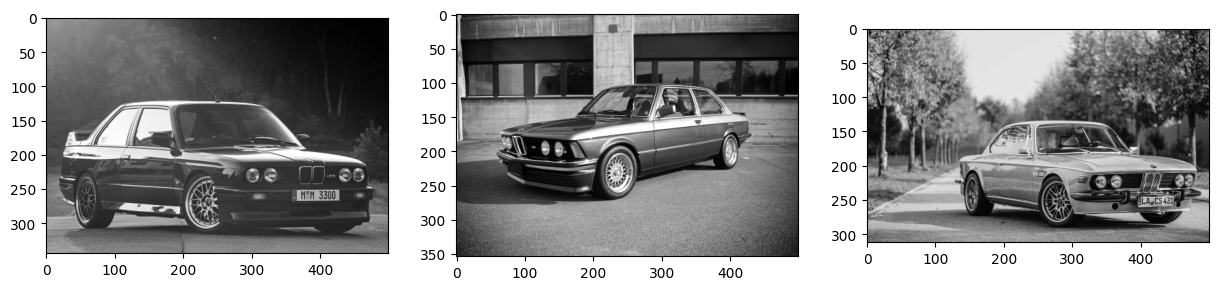

In [7]:
imgE30 = cv2.imread('imgs/E30.jpg',cv2.IMREAD_GRAYSCALE)
imgE21 = cv2.imread('imgs/E21.jpg', cv2.IMREAD_GRAYSCALE)
imgCS = cv2.imread('imgs/CS.jpg', cv2.IMREAD_GRAYSCALE)

targetWidth = 500

scale_percent = targetWidth / imgE30.shape[1]
width = int(imgE30.shape[1] * scale_percent)
height = int(imgE30.shape[0] * scale_percent)
dim = (width, height)
imgE30 = cv2.resize(imgE30, dim, interpolation=cv2.INTER_AREA)

scale_percent = targetWidth / imgE21.shape[1]
width = int(imgE21.shape[1] * scale_percent)
height = int(imgE21.shape[0] * scale_percent)
dim = (width, height)
imgE21 = cv2.resize(imgE21, dim, interpolation=cv2.INTER_AREA)

scale_percent = targetWidth / imgCS.shape[1]
width = int(imgCS.shape[1] * scale_percent)
height = int(imgCS.shape[0] * scale_percent)
dim = (width, height)
imgCS = cv2.resize(imgCS, dim, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imgE30, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(imgE21, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(imgCS, cmap='gray')
plt.show()

___
#### *Algoritmos de segmentación binaria*

A continuación se presentan tres algoritmos de segmentación binaria, siendo el primero un algoritmo local. 

In [8]:
def localBinarySegmentation(image, pixels = 50):
    # Copy image to not modify original
    img = image.copy()

    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            # Calculate area mean
            mean = 0
            for k in range(0, pixels):
                for l in range(0, pixels):
                    if i+k < img.shape[0] and j+l < img.shape[1]:
                        # If inside image, use pixel value
                        mean += img[i+k][j+l]
                    else:
                        # Use padding to avoid out of bounds
                        mean += img[img.shape[0] - (i + k) - 1][img.shape[1] - (j + l) - 1]

            # Calculate mean
            mean = mean / (pixels * pixels)

            # Apply threshold
            if img[i][j] > mean:
                img[i][j] = 255
            else:
                img[i][j] = 0

    return img

def otsuBinarySegmentation(image):
    img = image.copy()

    # Calculate histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    histNorm = hist.ravel() / hist.max()
    
    Q = histNorm.cumsum()
    bins = np.arange(256)
    fnMin = np.inf
    thresh = -1

    # Iterate through all thresholds
    for i in range(1,256):
        p1, p2 = np.hsplit(histNorm,[i])
        q1, q2 = Q[i], Q[255] - Q[i]
        b1, b2 = np.hsplit(bins, [i])

        # Finding means and variances
        if q1 == 0:
            q1 = 0.00000001
        if q2 == 0:
            q2 = 0.00000001

        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Calculate minimization function
        fn = v1 * q1 + v2 * q2

        # Update minimization function
        if fn < fnMin:
            fnMin = fn
            thresh = i

    ret, otsu = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
    return otsu

def riddlerCalvardBinarySegmentation(image, threshold = 0.5):
    img = image.copy()

    # Continue until threshold converges
    while True:
        # Initialize means and counts
        mean1 = 0
        mean2 = 0
        count1 = 0
        count2 = 0

        # Calculate means
        for i in range(0, img.shape[0]):
            for j in range(0, img.shape[1]):
                if img[i][j] < threshold:
                    # If pixel is below threshold, add to mean1
                    mean1 += img[i][j]
                    count1 += 1
                else:
                    # If pixel is above threshold, add to mean2
                    mean2 += img[i][j]
                    count2 += 1

        # Calculate new means
        mean1 = mean1 / count1 if count1 > 0 else 0
        mean2 = mean2 / count2 if count2 > 0 else 0

        # Calculate new threshold
        newThreshold = (mean1 + mean2) / 2

        # Check if threshold converged
        if abs(threshold - newThreshold) < 0.000001:
            break

        # Update threshold
        threshold = newThreshold

    # Apply threshold
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if img[i][j] < threshold:
                # If pixel is below threshold, set to 0
                img[i][j] = 0
            else:
                # If pixel is above threshold, set to 255
                img[i][j] = 255

    return img

Como se puede observar a continuación, el algoritmo de segmentación local presenta mejores resultados. Esto puede comprobar al tomar en consideración que fue el único en detectar los troncos de los árboles en la imagen. 

En nuestra opinión, los otros dos algoritmos sobre-simplifican la imagen, perdiendo información importante. Por ejemplo, las llantas traseras no se pueden ver claramente. Asimismo, los algoritmos de Otsu y Riddler-Calvard no detectan los troncos de los árboles.

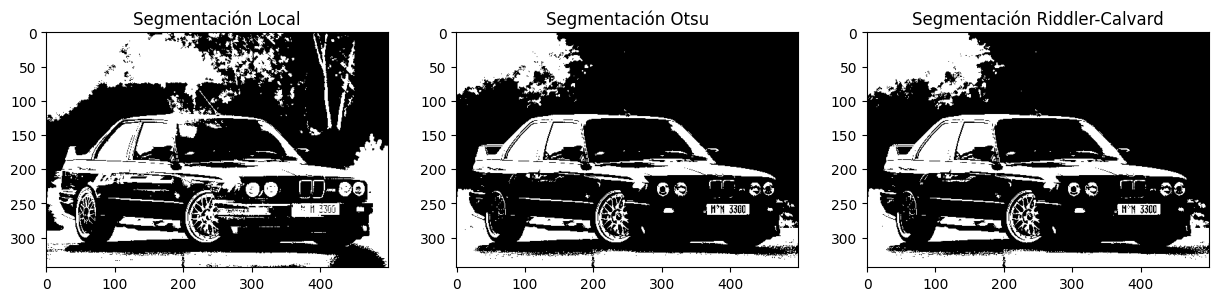

In [9]:
img1 = localBinarySegmentation(imgE30)
img2 = otsuBinarySegmentation(imgE30)
img3 = riddlerCalvardBinarySegmentation(imgE30)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Segmentación Local')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Segmentación Otsu')

plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.title('Segmentación Riddler-Calvard')
plt.show()

En este segundo ejemplo, creemos que segmentación local perdió un poco los detalles. Por ejemplo, no se puede ver el reflejo claro de los árboles en las ventanas (mientras que en los otros dos algoritmos sí).

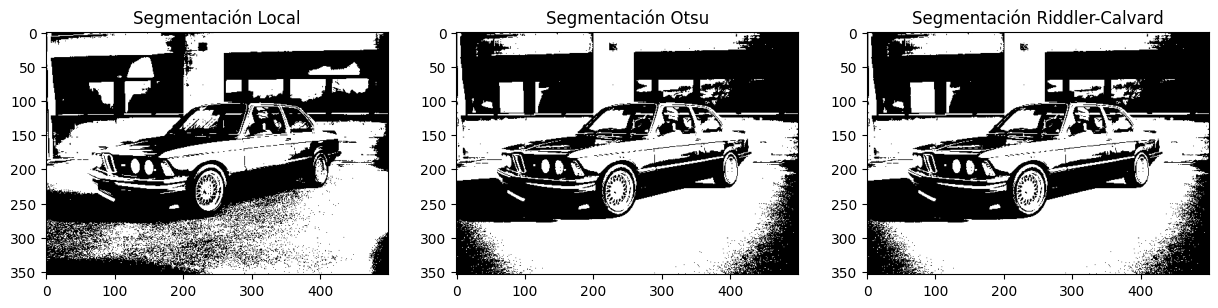

In [10]:
img1 = localBinarySegmentation(imgE21)
img2 = otsuBinarySegmentation(imgE21)
img3 = riddlerCalvardBinarySegmentation(imgE21)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Segmentación Local')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Segmentación Otsu')

plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.title('Segmentación Riddler-Calvard')
plt.show()

En este tercer y último ejemplo, creemos que segmentación local tuvo mejores resultados. Esto debido a que los detalles del carro (como las llantas) son más claros y distinguibles. Los otros dos algoritmos tienden a sobre-simplificar la imagen, perdiendo detalles importantes.

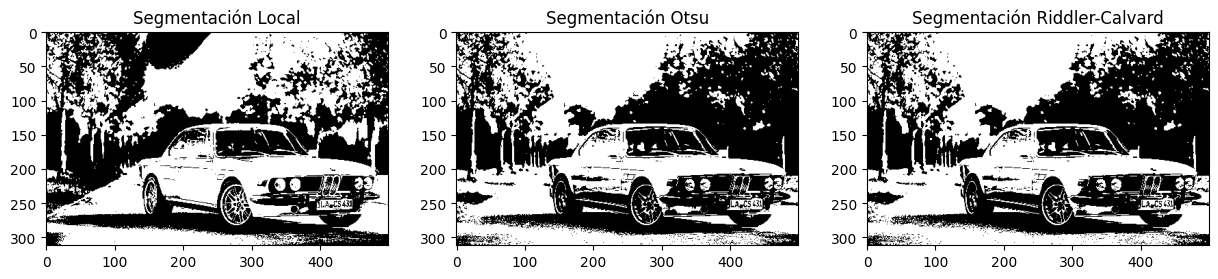

In [11]:
img1 = localBinarySegmentation(imgCS)
img2 = otsuBinarySegmentation(imgCS)
img3 = riddlerCalvardBinarySegmentation(imgCS)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Segmentación Local')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Segmentación Otsu')

plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.title('Segmentación Riddler-Calvard')
plt.show()

____
#### *Resultados*

En general, el algoritmo local es el que mejor resultados obtiene, ya que es el que mejor identifica los objetos de la imagen. Los algoritmos de Otsu y Riddler-Calvard obtienen resultados similares, pero no son tan precisos como el algoritmo local. El único problema del algoritmo local es excesivamente lento, ya que tiene que recorrer toda la imagen para obtener el umbral de cada pixel, razón por la cual se redujo la resolución de las imágenes. Para imagenes pequeñas, el algoritmo local es el mejor, pero para imagenes grandes, los algoritmos de Otsu y Riddler-Calvard son los mejores.